This is a short overview helping to explain some basic Fourier transforms using the Librosa STFT function.

If mounting your gdrive you will need to adjust the filename according to your directory.

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import librosa
import librosa.display
from IPython.display import Audio
import numpy as np
import matplotlib.pyplot as plt

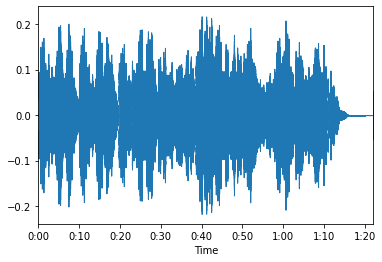

In [4]:
filename = '/content/gdrive/MyDrive/Fellowship.AI/colab/Fur_Elise.wav'
#load data and sample rate from file
fur_elise, sr = librosa.load(filename)
# Display full song
librosa.display.waveplot(fur_elise, sr=sr);

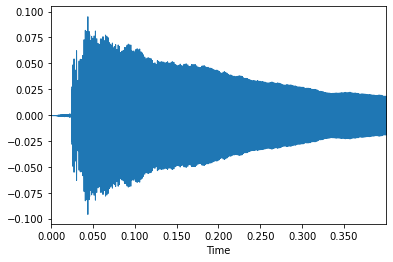

In [5]:
## save the first note (E5) from fur elise
data1, sr1 = librosa.load(filename,duration=0.4)

librosa.display.waveplot(data1, sr=sr1);
Audio(data=data1,rate=sr1)

Using librosa short-time fourier transform and the recommended n_fft for music (2048).

The X axis of the plot isn't in frequency but rather in frequency bins. The actual frequency can be calculated.

The first note of fur elise is E5 (~659 Hz)
From the plot of our fourier transform we can see that the correct key was played but the piano was 3 Hz out of tune

After the onset (1st harmonic) of the first note there will be harmonics that repeate every n*onset_frequency.
In this case the onset is bin 61 so the second harmonic should appear at 2*61 = 122
Third harmonic should appear at 3*61 = 183

(1025, 1)
Max signal = 2.662945
FFT bin containing max signal = 61
Frequency at max signal =  656.7626953125


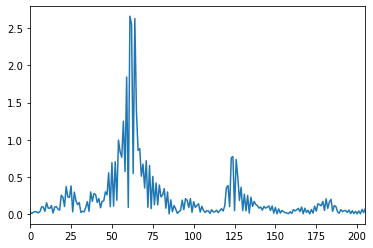

In [32]:
#sample rate = 22050
#number of freq bins
#f_bins = 1+n_fft/2
n_fft = 2048

D1 = np.abs(librosa.stft(data1[:n_fft], n_fft=n_fft, hop_length = n_fft+1,  win_length=n_fft))

plt.plot(D1);
plt.xlim([0, n_fft/10])

print(D1.shape)
print("Max signal =", np.max(D1))
print("FFT bin containing max signal =", np.argmax(D1))
# Nth bin frequency = N * sample_rate / n_fft
print("Frequency at max signal = ", np.argmax(D1) * sr1 / n_fft)


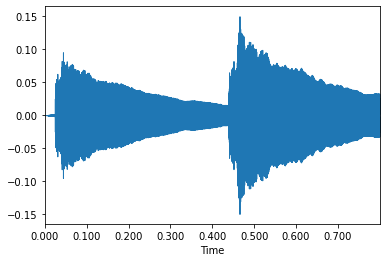

In [28]:
## save the first two notes (E5 and E#5) from fur elise
data2, sr2 = librosa.load(filename,duration=0.8)
librosa.display.waveplot(data2, sr=sr2)

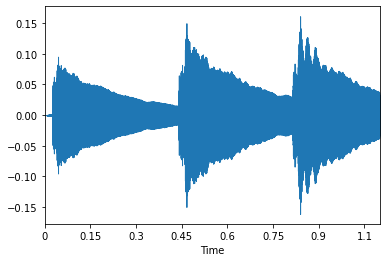

In [27]:
## save the three notes (E5,E#5,E5) from fur elise
data3, sr3 = librosa.load(filename,duration=1.1)
librosa.display.waveplot(data3, sr=sr3)

Now we're going to see what happens with the first two notes and first three notes.

The fur elise notes are:
  E5 (659Hz), E#5 (622Hz), and E5 (659Hz)

When we plot the fourier transform of the first two notes we can see that a new bigger peak has appeared slightly before our first note. This makes sense because the second note E#5 is at a lower frequency than E5 and should appear first. Also, from the plot above in the time domain the amplitude of the second note is higher than the first which also shows in the frequency domain below.
Note: the harmonics of the second note are also shifted accordingly

(0.0, 204.8)

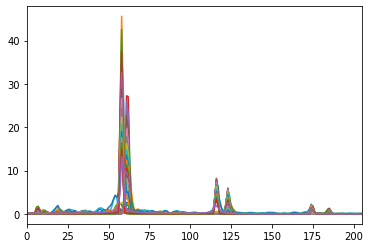

In [29]:
#calculate the fourier transform of the first two notes
D2 = np.abs(librosa.stft(data2, n_fft=n_fft))

#plot the first two notes in freq domain
plt.plot(D2);
plt.xlim([0, n_fft/10])


If you remember the fur elise notes are: E5 (659Hz), E#5 (622Hz), and E5 (659Hz). 
Even though we are playing a third note which is obvious in the time domain it isn't so obvious in the frequency domain as you can see below.

The third note was played with more power than the first so the amplitude is higher in bin 61 but it does't create a new spike since its the same frequency and note.

Another thing to think about is what if you play E5 (659Hz) and then play E6 (1318Hz) at the same time the second harmonic of E5 (2*659Hz =1318Hz) occurs.
 

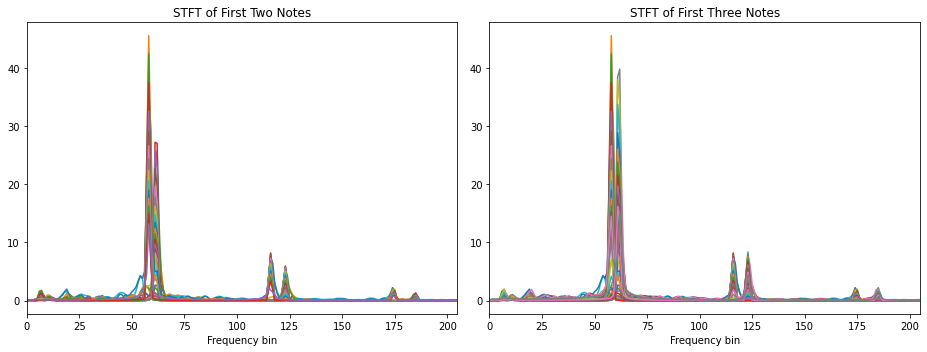

In [40]:
#calculate the fourier transform of the first 3 notes
D3 = np.abs(librosa.stft(data3, n_fft=n_fft))

#plot two and three notes side by side in freq domain
plt.figure(figsize=(13, 5));

plt.subplot(1, 2, 1);
plt.plot(D2);
plt.xlim([0, n_fft/10])
plt.xlabel('Frequency bin')
plt.title('STFT of First Two Notes');

plt.subplot(1, 2, 2);
plt.plot(D3);
plt.xlim([0, n_fft/10])
plt.xlabel('Frequency bin')
plt.title('STFT of First Three Notes');

plt.tight_layout();